# Running different algorithms

### Importing libraries

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from os import listdir
from sklearn.cross_validation import train_test_split 

### Defining path to data

In [14]:
path = 'C:/Users/izaou/Documents/ML_Project-master/clean_data/'

In [15]:
print(listdir(path))

['complete_gradboost_GENDER.csv', 'complete_logreg_GENDER.csv', 'complete_randforest_GENDER.csv', 'Parameters', 'targets.csv', 'targets_flat.csv', 'test.csv', 'train.csv', 'train_age_only_filled.csv']


### Loading train data

In [16]:
train = pd.read_csv(path + 'train.csv', index_col='user_id')
targets = pd.read_csv(path + 'targets_flat.csv', dtype={"user_id":object, "country_destination":object}, index_col=['user_id'])
targets_train = targets[targets.country_destination.notnull()].values.reshape(-1,)

targets_train

In [17]:
train_age=pd.read_csv(path +'train_age_only_filled.csv', index_col='user_id')
train_gender=pd.read_csv(path +'complete_gradboost_GENDER.csv', index_col='user_id')
train_age=train_age.astype(np.float)
train_gender=train_gender.astype(np.float)
to_drop1= ['age', 'gender__MALE', 'gender__FEMALE', 'gender__OTHER','language__no','signup_method__google','first_affiliate_tracked__local ops','affiliate_provider__naver','affiliate_provider__baidu','affiliate_provider__yandex','language__id','language__hu','affiliate_provider__wayn','language__da','language__tr','language__th','language__fi','date_account_created_hour_sin','language__is','language__is','date_account_created_hour_cos','language__ca','language__cs','affiliate_provider__daum','language__hr','signup_method__weibo']
to_drop2= ['language__no','signup_method__google','first_affiliate_tracked__local ops','affiliate_provider__naver','affiliate_provider__baidu','affiliate_provider__yandex','language__id','language__hu','affiliate_provider__wayn','language__da','language__tr','language__th','language__fi','date_account_created_hour_sin','language__is','language__is','date_account_created_hour_cos','language__ca','language__cs','affiliate_provider__daum','language__hr','signup_method__weibo']
df1_train = train.drop(to_drop1, axis=1)
#train set with age and gender missing value not filled
df2_train = train.drop(to_drop2, axis=1)


## Predicting classes by taking out age and gender

### Defining the train dataset

In [18]:
# train set with filled age and gender
df_train = pd.concat([df1_train, train_age,train_gender], axis=1, join_axes=[df1_train.index])

### Importing libraries

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import timeit
from sklearn.cross_validation import train_test_split #for splitting data into train and test



### Defining classifiers

In [20]:
from sklearn.metrics import  accuracy_score
from sklearn.metrics import  f1_score
from sklearn.metrics import recall_score

def test_classifier(X_train, y_train, X_test, y_test, classifier):
    print("")
    print("=====================")
    start = timeit.default_timer()
    classifier_name = str(type(classifier).__name__)
    print("Testing " + classifier_name)
    model = classifier.fit(X_train, y_train)
    predictions = model.predict(X_test)
    stop = timeit.default_timer()
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted') 
    recall = recall_score(y_test, predictions, average='weighted')
    
    print("========== Results======.====")
    print("Accuracy " + str(accuracy))
    print("F1 score " + str(f1))
    print("recall score " + str(recall))
    print( 'running time:' ,stop - start, 's')
    print("============================")

    return predictions

### Fitting data

In [11]:
X_train, X_test, y_train, y_test=train_test_split(df_train,targets_train,test_size=0.2)
XGB=xgb.XGBClassifier(**{'n_estimators':200,'objective':'multi:softmax','max_depth':6})
pred_xgb=test_classifier(X_train, y_train, X_test, y_test, XGB)


Testing XGBClassifier
========== Results==========
Accuracy 0.61895949966


NameError: global name 'f1' is not defined

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
pred_Xgboosting=[]

for i in range(0,5):
    X_train, X_test, y_train, y_test=train_test_split(df2_train,targets_train,test_size=0.2)

    XGB=xgb.XGBClassifier(**{'n_estimators':250,'objective':'multi:softmax','max_depth':6})
    pred_xgb=test_classifier(X_train, y_train, X_test, y_test, XGB)
    pred_Xgboosting.append(accuracy_score(y_test,pred_xgb))
    print np.mean(pred_Xgboosting)
    
    


Testing XGBClassifier


C:\Users\izaou\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


========== Results======.====
Accuracy 0.637160057155
F1 score 0.588162892776
recall score 0.637160057155
('running time:', 2392.046610294032, 's')
0.637160057155

Testing XGBClassifier


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
class_names=['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US','other']
cnf_matrix=confusion_matrix(y_test,pred_xgb)
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix xgboost')

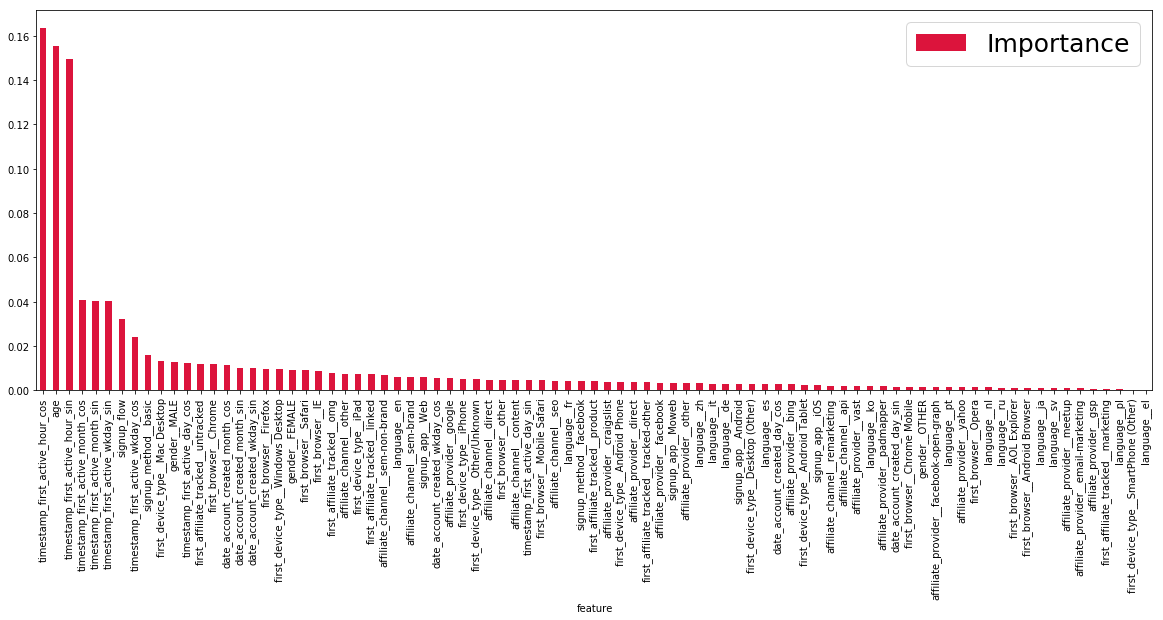

In [55]:
features = pd.DataFrame()
features['feature'] = df_train.columns
features['Importance'] = XGB.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='bar', figsize=(20, 7), color='crimson')
plt.legend(['Importance'],prop=({'size':25}))
plt.show()